rBergomi: variance reduction tests
==

$$S_t = \mathcal{E} \left\{ \int_0^t \sqrt{ V_u } \ \mathrm{d} \ (\rho W^1_u + \bar{\rho} W^2_u) \right\}, \quad V_t = \xi \ \mathcal{E} \left\{ \eta \sqrt{2\alpha + 1} \int_0^t (t - u)^\alpha \mathrm{d}W^1_u \right\},$$

CAREFUL WITH WHERE DATA FILES ARE KEPT FOR THIS, BEST TO CHANGE SURFACE CODE TEMPORARILY.
MUST GIVE BIAS AND STANDARD DEVIATION ON CHARTS!

In [1]:
import os
os.chdir('/Users/ryanmccrickerd/Desktop/phd/2016-17/turbo_rbergomi/rbergomi')

In [2]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.mlab as mlab
from rbergomi import rBergomi
from surface import Surface
from routines import *
% matplotlib inline

Set antithetic sampling here

In [ ]:
rbergomi = rBergomi(n = 8, N = 300, T = 0.25, a = -0.43, AS = True)

In [ ]:
surface = Surface('3m', 'base', close = False)
surface.surface

In [ ]:
# rho = -np.sqrt(2)/2
rho = -0.9
kwargs = {'xi':0.235**2, 'eta':1.9, 'rho':rho}

Select implied vol construction here

In [ ]:
# method = base_run
# method = base_put_run
# method = moment_matching
# method = conditional_mc
# method = price_control
# method = timer_control
# method = optimal_run
method = optimal_scatter

In [ ]:
np.random.seed(0)

In [ ]:
# %%timeit
# IV = method(rbergomi, surface, **kwargs)
# # Run this a few times so that libraries loaded.

In [ ]:
CD = method(rbergomi, surface, **kwargs)

DATA IS BELOW NOW JUST PLOT!

In [ ]:
np.shape(CD)
# last entry denotes strike
k = 2
N = int(len(CD[0, :, 0, 0])/2)
base1 =    CD[0, :N, 0, k]
control1 = CD[1, :N, 0, k]
base2 =    CD[0, N:, 0, k]
control2 = CD[1, N:, 0, k]

In [ ]:
figsize = (4,2.5)
plt.figure(figsize=figsize, dpi = 100000)
plt.scatter(base1, control1, alpha = 0.25, c='b', edgecolors=None, linewidths=0.5, s=50)
plt.scatter(base2, control2, alpha = 0.25, c='b', edgecolors=None, linewidths=0.5, s=50)
plt.grid(True)
plt.xlabel(r'$X = BS( ( 1-\rho^2 ) V_{0,t} ; S_t^1, k )$', fontsize = 12)
plt.ylabel(r'$Y = BS( \rho^2(Q - V_{0,t} ) ; S^1_t, k ) $', fontsize = 12)
# plt.axis([-0.01, 0.16, -0.005, 0.205])
# plt.xticks(np.arange(-0.00, 0.20, 0.05))
# plt.yticks(np.arange(-0.00, 0.25, 0.05))

Recall must iterate input file vols to a fixed point. Use 250,000 antithetic paths for this.

In [ ]:
np.corrcoef(base, control)

In [6]:
import xlwings as xw

install_path = '/Users/ryanmccrickerd/Desktop/phd/2016-17'
# file_path = install_path + '/rbergomi/data/market/' + settings + '_' + tenor + '.xlsx'
file_path = install_path + '/calibration_results.xlsx'

# Instantiate xlwings object
wb = xw.Book(file_path)
sht = wb.sheets['Sheet1']

# Copy results
base_output = np.array(sht.range('B3:C102').value) # - np.array([-0.9,1.9])
optimal_output = np.array(sht.range('F3:G102').value) # - np.array([-0.9,1.9])
# wb.save()

In [7]:
np.shape(base_output)

(100, 2)

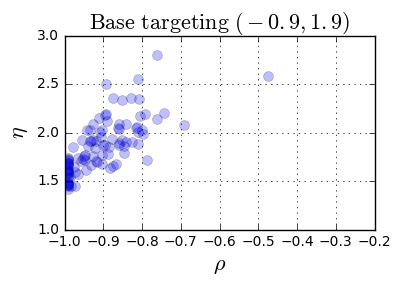

In [8]:
figsize = (4,2.5)
plt.figure(figsize=figsize)
plt.scatter(base_output[:,0], base_output[:,1], alpha = 0.25, c='b', edgecolors=None, linewidths=0.5, s=50)
plt.grid(True)
# plt.xlabel(r'$X = BS( ( 1-\rho^2 ) V_{0,t} ; S_t^1, k )$', fontsize = 16)
# plt.ylabel(r'$Y = BS( \rho^2(Q - V_{0,t} ) ; S^1_t, k ) $', fontsize = 16)
plt.axis([-1, -0.1999, 1, 3])
plt.xlabel(r'$\rho$', fontsize = 16)
plt.ylabel(r'$\eta$', fontsize = 16)
plt.title(r'$\mathrm{Base\ targeting\ (-0.9,1.9)}$', fontsize = 16)
# plt.xticks(np.arange(0, 0.153, 0.03))

fname = '/Users/ryanmccrickerd/Desktop/phd/2017-18/turbo/calibration0.pdf'
plt.savefig(fname, dpi=300, bbox_inches='tight')

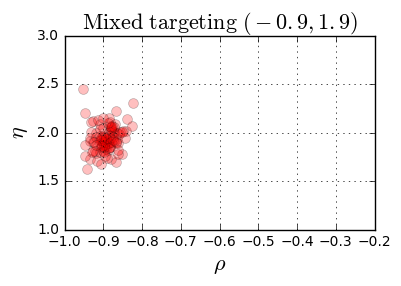

In [9]:
plt.figure(figsize=figsize)
plt.scatter(optimal_output[:,0], optimal_output[:,1], alpha = 0.25, c='r', edgecolors=None, linewidths=0.5, s=50)
plt.grid(True)
plt.axis([-1, -0.1999, 1, 3])
plt.xlabel(r'$\rho$', fontsize = 16)
plt.ylabel(r'$\eta$', fontsize = 16)
plt.title(r'$\mathrm{Mixed\ targeting\ (-0.9,1.9)}$', fontsize = 16)

fname = '/Users/ryanmccrickerd/Desktop/phd/2017-18/turbo/calibration1.pdf'
plt.savefig(fname, dpi=300, bbox_inches='tight')

In [10]:
# Copy results
base_output = np.array(sht.range('K3:L102').value) # - np.array([-0.9,1.9])
optimal_output = np.array(sht.range('O3:P102').value) # - np.array([-0.9,1.9])
# wb.save()

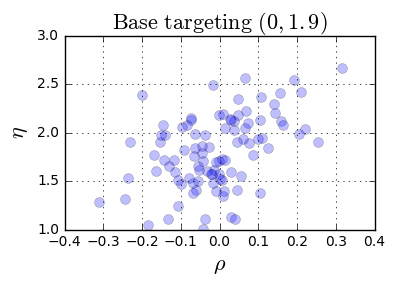

In [11]:
figsize = (4,2.5)
plt.figure(figsize=figsize)
plt.scatter(base_output[:,0], base_output[:,1], alpha = 0.25, c='b', edgecolors=None, linewidths=0.5, s=50)
plt.grid(True)
# plt.xlabel(r'$X = BS( ( 1-\rho^2 ) V_{0,t} ; S_t^1, k )$', fontsize = 16)
# plt.ylabel(r'$Y = BS( \rho^2(Q - V_{0,t} ) ; S^1_t, k ) $', fontsize = 16)
plt.axis([-0.4, 0.4, 1, 3])
plt.xlabel(r'$\rho$', fontsize = 16)
plt.ylabel(r'$\eta$', fontsize = 16)
plt.title(r'$\mathrm{Base\ targeting\ (0,1.9)}$', fontsize = 16)
# plt.xticks(np.arange(0, 0.153, 0.03))

fname = '/Users/ryanmccrickerd/Desktop/phd/2017-18/turbo/calibration2.pdf'
plt.savefig(fname, dpi=300, bbox_inches='tight')

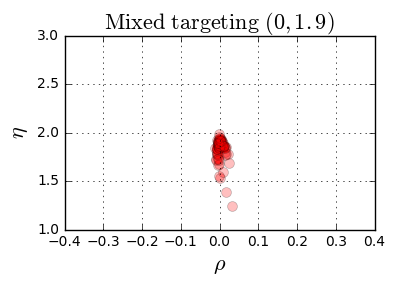

In [12]:
plt.figure(figsize=figsize)
plt.scatter(optimal_output[:,0], optimal_output[:,1], alpha = 0.25, c='r', edgecolors=None, linewidths=0.5, s=50)
plt.grid(True)
plt.axis([-0.4, 0.4, 1, 3])
plt.xlabel(r'$\rho$', fontsize = 16)
plt.ylabel(r'$\eta$', fontsize = 16)
plt.title(r'$\mathrm{Mixed\ targeting\ (0,1.9)}$', fontsize = 16)

fname = '/Users/ryanmccrickerd/Desktop/phd/2017-18/turbo/calibration3.pdf'
plt.savefig(fname, dpi=300, bbox_inches='tight')